# 🟦 miniROS — Notebook 2
## Teleoperation & Custom Nodes

In this notebook you will learn:
- How to pull the latest `miniROS` repository
- How to import miniROS modules in Colab
- How to create custom nodes that publish to `/cmd_vel`
- How to implement **teleoperation** with **buttons** (Colab-safe)
- How to combine multiple nodes
- How to visualize the robot trajectory

**Important:** Colab does *not* support real keyboard input for robotics, so we implement teleoperation with **ipywidgets buttons**, similar to how many ROS tutorials use GUI teleop panels.

---
## Step 1 — Download miniROS from GitHub
Repository: https://github.com/eder1234/miniROS


In [1]:
!rm -rf miniROS
!git clone https://github.com/eder1234/miniROS.git
print("miniROS downloaded.")

Cloning into 'miniROS'...
remote: Enumerating objects: 68, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 68 (delta 32), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (68/68), 17.60 KiB | 3.52 MiB/s, done.
Resolving deltas: 100% (32/32), done.
miniROS downloaded.


## Step 2 — Add miniROS to Python path and import everything


In [2]:
import sys
sys.path.append('/content/miniROS')

from core.simulator import MiniRosSimulator
from robots.diffdrive import DiffDriveRobot
from core.messages import Twist, Pose2D
from core.node import Node

print("miniROS modules imported.")

miniROS modules imported.


## Step 3 — Teleoperation Node (Button-based GUI)

We use `ipywidgets` to create a small teleoperation interface.

**Teleop logic:**
- Press a button → publish a Twist command
- Release/Stop → publish Twist(0,0)

This mimics ROS teleop packages (`teleop_twist_keyboard`, `rqt_robot_steering`).


In [3]:
import ipywidgets as widgets
from IPython.display import display

class TeleopNode(Node):
    def __init__(self, topic="/cmd_vel", v=0.4, w=1.0):
        super().__init__("teleop")
        self.topic = topic
        self.v = v
        self.w = w
        self.current_cmd = Twist(0,0)

        # Buttons
        self.btn_forward = widgets.Button(description='↑ Forward')
        self.btn_backward = widgets.Button(description='↓ Backward')
        self.btn_left = widgets.Button(description='← Left')
        self.btn_right = widgets.Button(description='→ Right')
        self.btn_stop = widgets.Button(description='■ Stop')

        # Assign actions
        self.btn_forward.on_click(lambda _: self.set_cmd(self.v, 0))
        self.btn_backward.on_click(lambda _: self.set_cmd(-self.v, 0))
        self.btn_left.on_click(lambda _: self.set_cmd(0, self.w))
        self.btn_right.on_click(lambda _: self.set_cmd(0, -self.w))
        self.btn_stop.on_click(lambda _: self.set_cmd(0, 0))

    def set_cmd(self, v, w):
        self.current_cmd = Twist(v, w)

    def gui(self):
        display(widgets.HBox([self.btn_left, self.btn_forward, self.btn_right]))
        display(widgets.HBox([self.btn_backward, self.btn_stop]))

    def step(self, dt):
        self.publish(self.topic, self.current_cmd)


print("TeleopNode created.")

TeleopNode created.


## Step 4 — Create Simulator + Robot


In [4]:
sim = MiniRosSimulator(dt=0.05)

robot = DiffDriveRobot(
    init_pose=Pose2D(0.0, 0.0, 0.0),
    radius=0.2,
    cmd_topic="/cmd_vel"
)

sim.add_robot(robot)
print("Robot initialized.")

Robot initialized.


## Step 5 — Add Teleoperation Node and Display GUI

Click the buttons to send velocity commands.


In [5]:
teleop = TeleopNode(v=30.3, w=10.0)
sim.add_node(teleop)

print("Teleoperation interface:")
teleop.gui()

Teleoperation interface:


## Step 6 — Run Simulation for 6 Seconds

Drive the robot using the buttons **before** running this cell.

After 6 seconds the trajectory will be plotted.


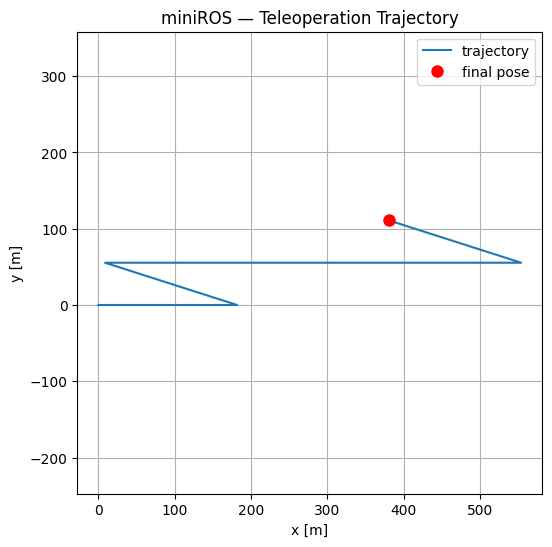

In [16]:
sim.run(6.0)

import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.plot(robot.traj_x, robot.traj_y, label="trajectory")
plt.plot(robot.pose.x, robot.pose.y, 'ro', markersize=8, label="final pose")
plt.axis('equal')
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.title("miniROS — Teleoperation Trajectory")
plt.grid(True)
plt.legend()
plt.show()

---
# 🧪 Exercises

### **Exercise 1 — Create a GoForwardNode**
Make a node that publishes `v=0.4`, `w=0` at every step.

### **Exercise 2 — Create a TimedStopNode**
Stop the robot after 3 seconds.

### **Exercise 3 — Combine Teleop + LoggerNode**
LoggerNode prints `/cmd_vel` each timestep.

### **Exercise 4 — Make a square trajectory**
- Move straight 2 seconds
- Turn left 1 second
- Repeat

### **Exercise 5 — Implement Smooth Steering**
Instead of instant turns, gradually change `w`.

---
## End of Notebook 2 — Teleoperation
Next notebook will introduce **LIDAR sensors & obstacle avoidance**.
